# Perform Explortatory Data Analysis (EDA) on Heart Disease Kaggle Project
Post the link to your GitHub repo for Mini-Project part I: EDA
    Your notebook should address each of the following:
        *Data issues: missing values, duplicate values, outliers
        *Data cleaning solutions: imputation/estimation, dropping entries -- justify your choices!
        *Describe the realtionship of features to your target (should include at least a few plots).
        Feature engineering (transformation, normalization, createing new combinations of features, etc), if you think this is 
        necessary. Describe your rationale.

Use as reference from class:  https://files.slack.com/files-pri/TSATBMVC7-F01569TTGBH/load_plot_eda.ipynb

I made this notebook to explore a heart disease dataset found here: https://www.kaggle.com/ronitf/heart-disease-uci

# In-class Group Data Exploration

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [34]:
#load the data
df = pd.read_csv('heart.csv')

In [35]:
#common df exploration:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
#common df exploration EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
#common EDA exploration, gives summary statistics of variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
#common EDA exploration
#df.isnull() gives overall
df.isnull().sum()   #gives columns with null data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
#common EDA exploration, if wondering whether any features might be particularly informative, we want to predict target
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [40]:
#find shape of data set
df.shape

(303, 14)

In [41]:
correlations = df.corr()

In [42]:
#how many heart disease cases do we have in this set?
#things can get challenging if in giant dataset (1,000+) and we only have 2 samples, so this can show us what we can get for target

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
#break that out by sex
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

In [44]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

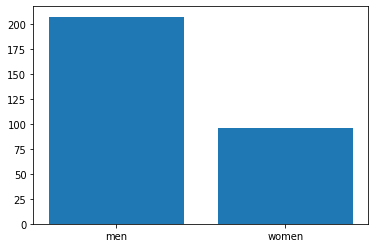

In [45]:
df['sex'].value_counts()
x = ['men', 'women']
y = [207, 96]
plt.bar(x,y)
plt.show()
#should have taller first column for men

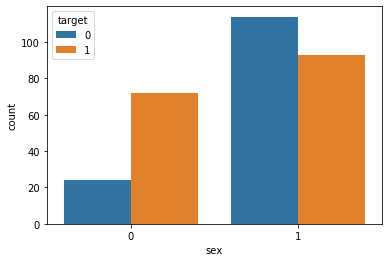

In [46]:
sns.countplot(x ='sex', hue = 'target', data = df)

"I noticed something interesting: the different sexes appear to have a different distribution of target, so next I wanted to look at: ______"

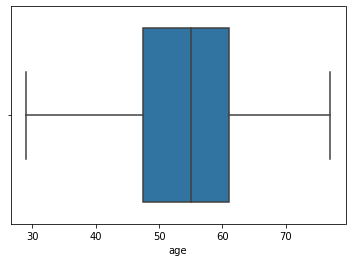

In [47]:
sns.boxplot(df['age'])
plt.show()

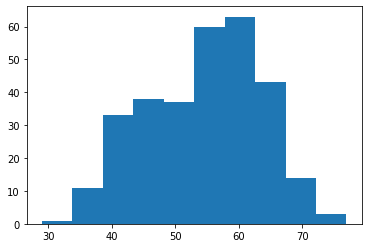

In [48]:
plt.hist(df['age'])
plt.show()

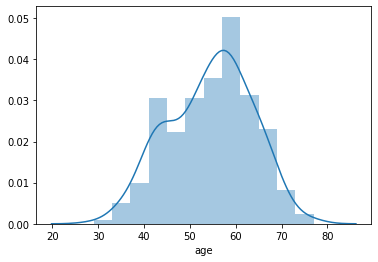

In [49]:
sns.distplot(df['age'])

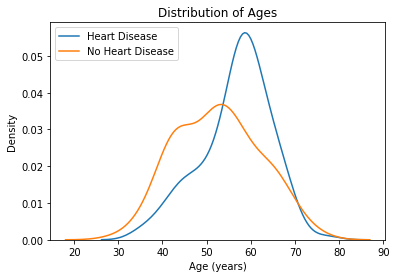

In [50]:
#generate KDE plots looking at age distribution by target label
#plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


In [51]:
correlations = df.corr()

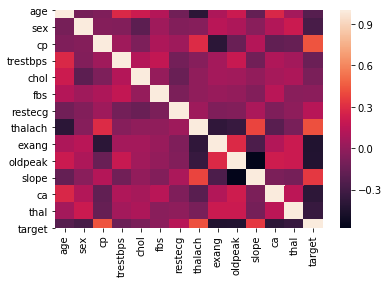

In [52]:
sns.heatmap(correlations)

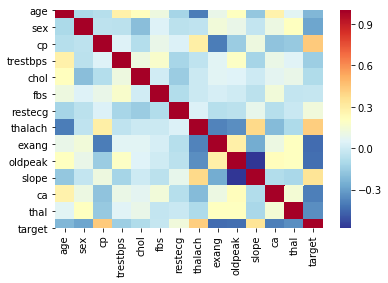

In [53]:
sns.heatmap(correlations,cmap=plt.cm.RdYlBu_r)

C:\Users\S\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\S\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


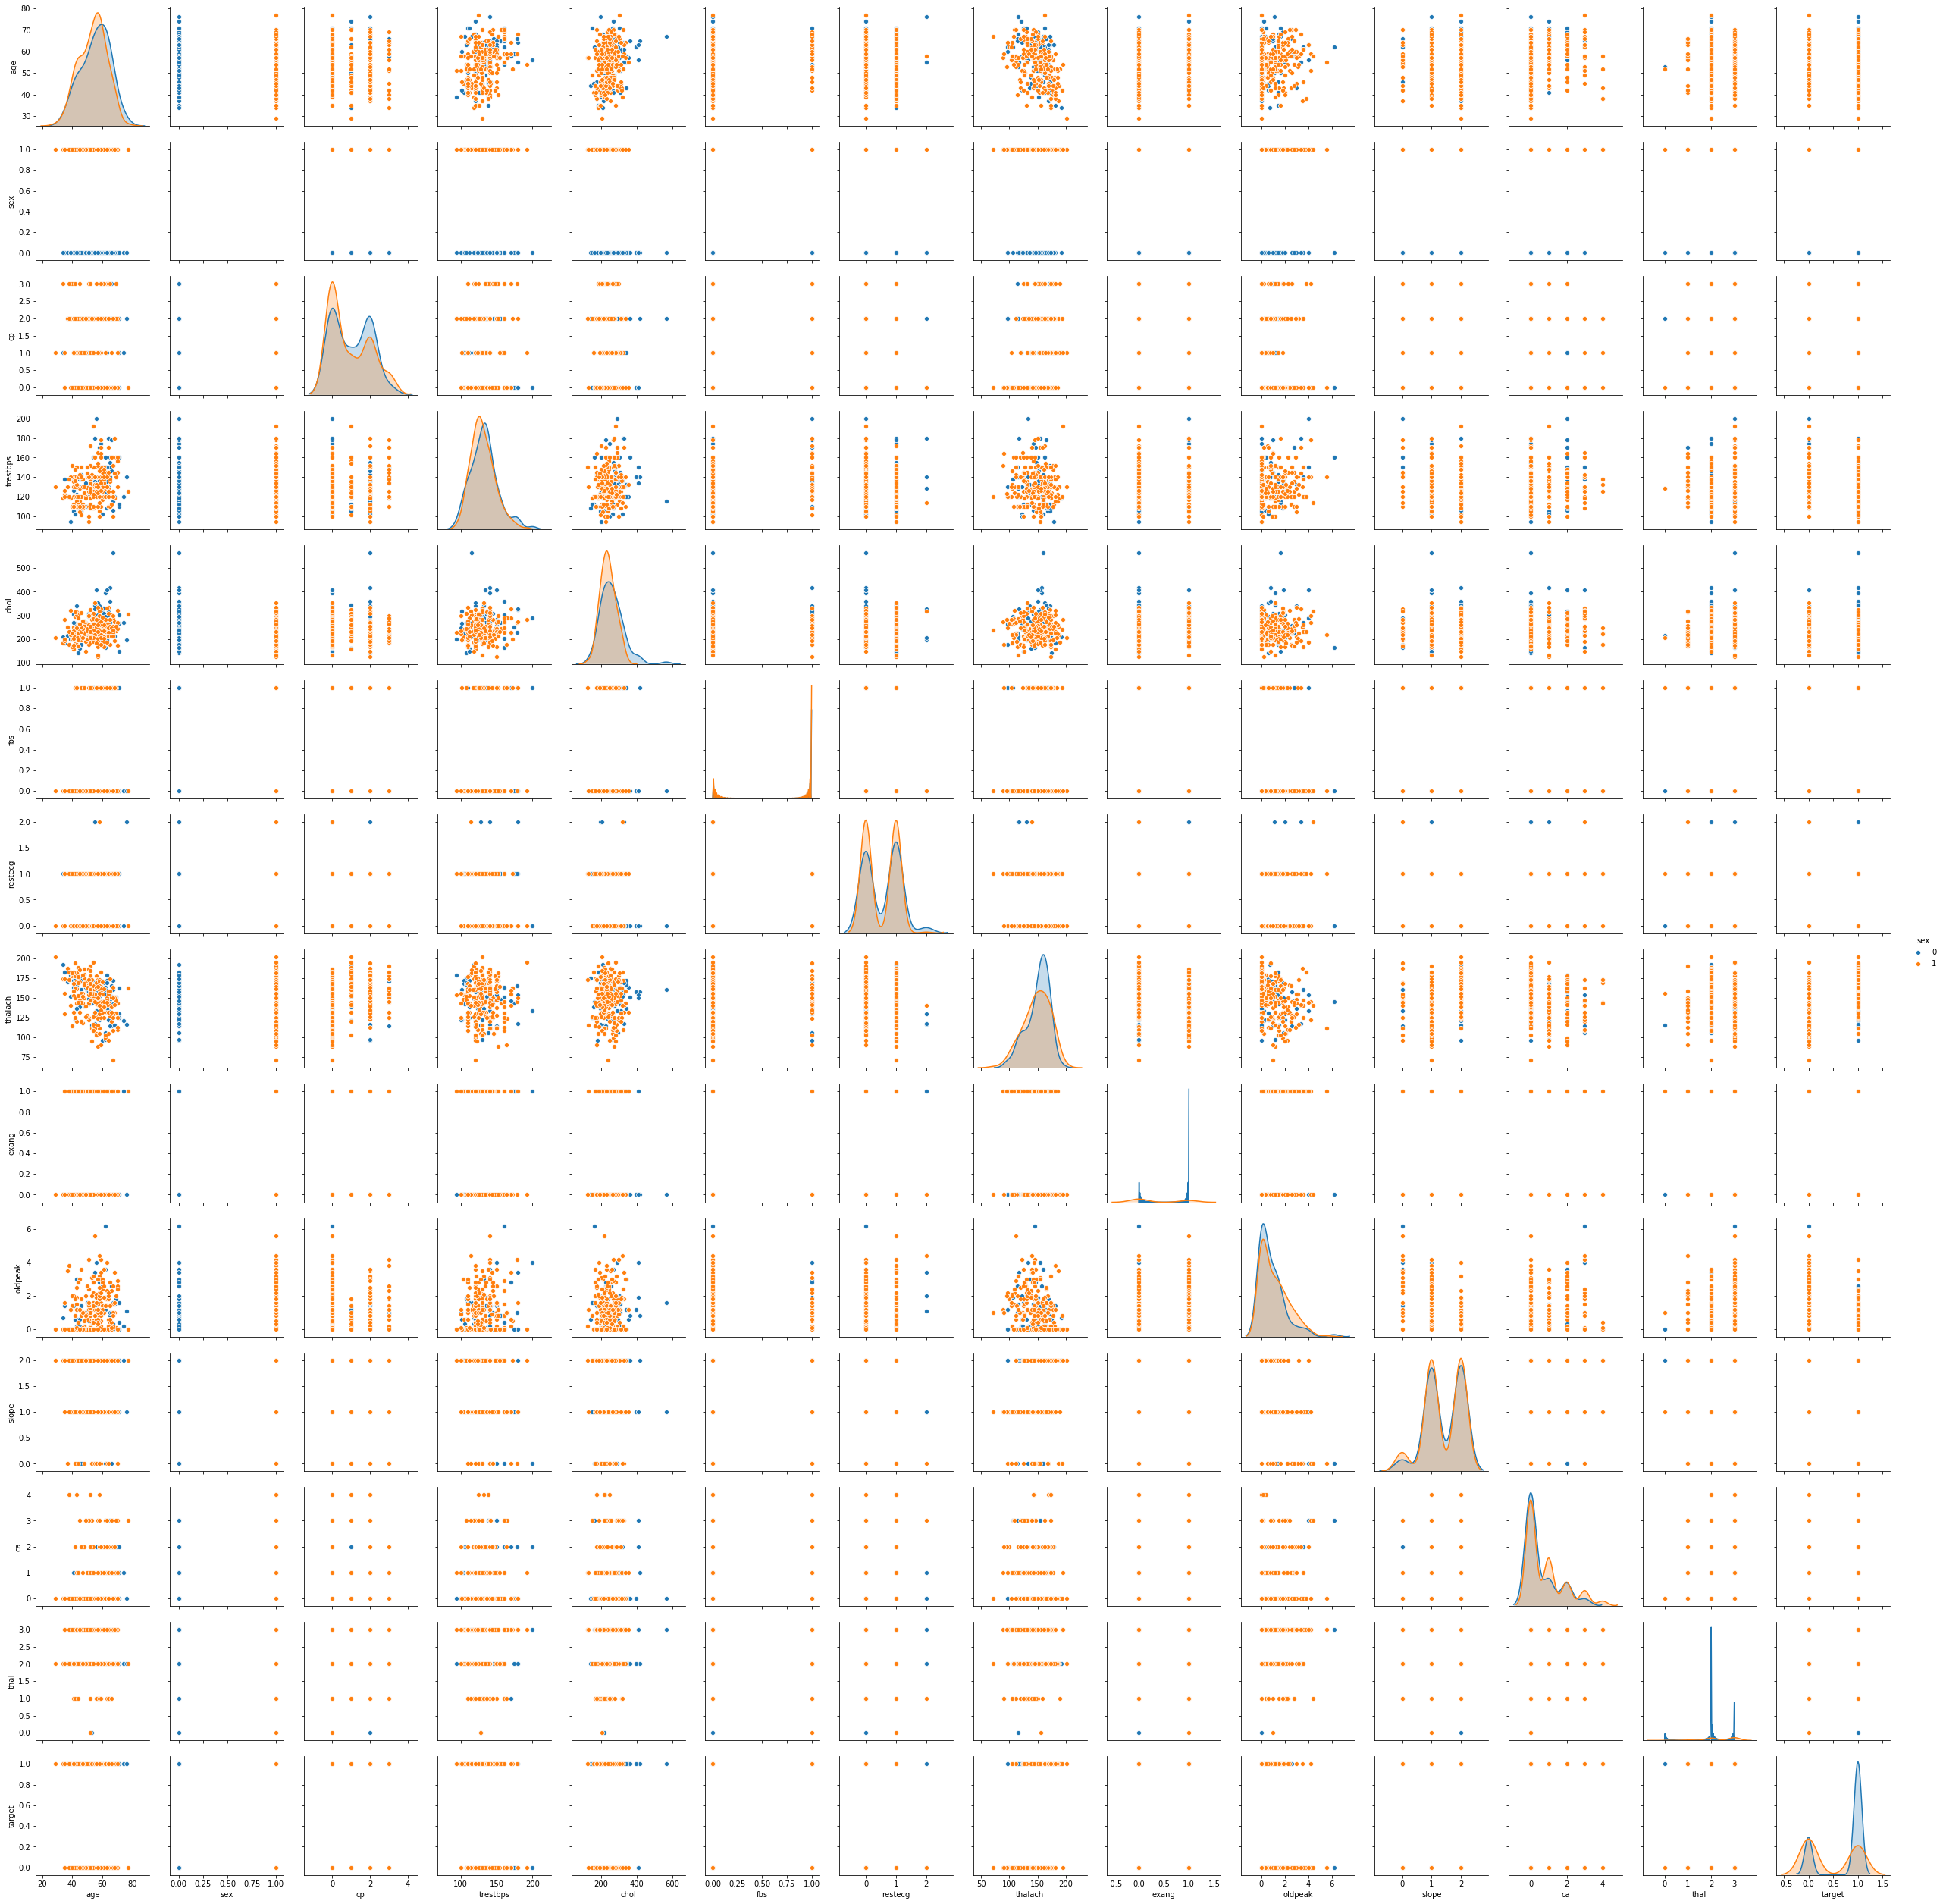

In [54]:
g = sns.pairplot(data=df,hue="sex")

<function matplotlib.pyplot.show(*args, **kw)>

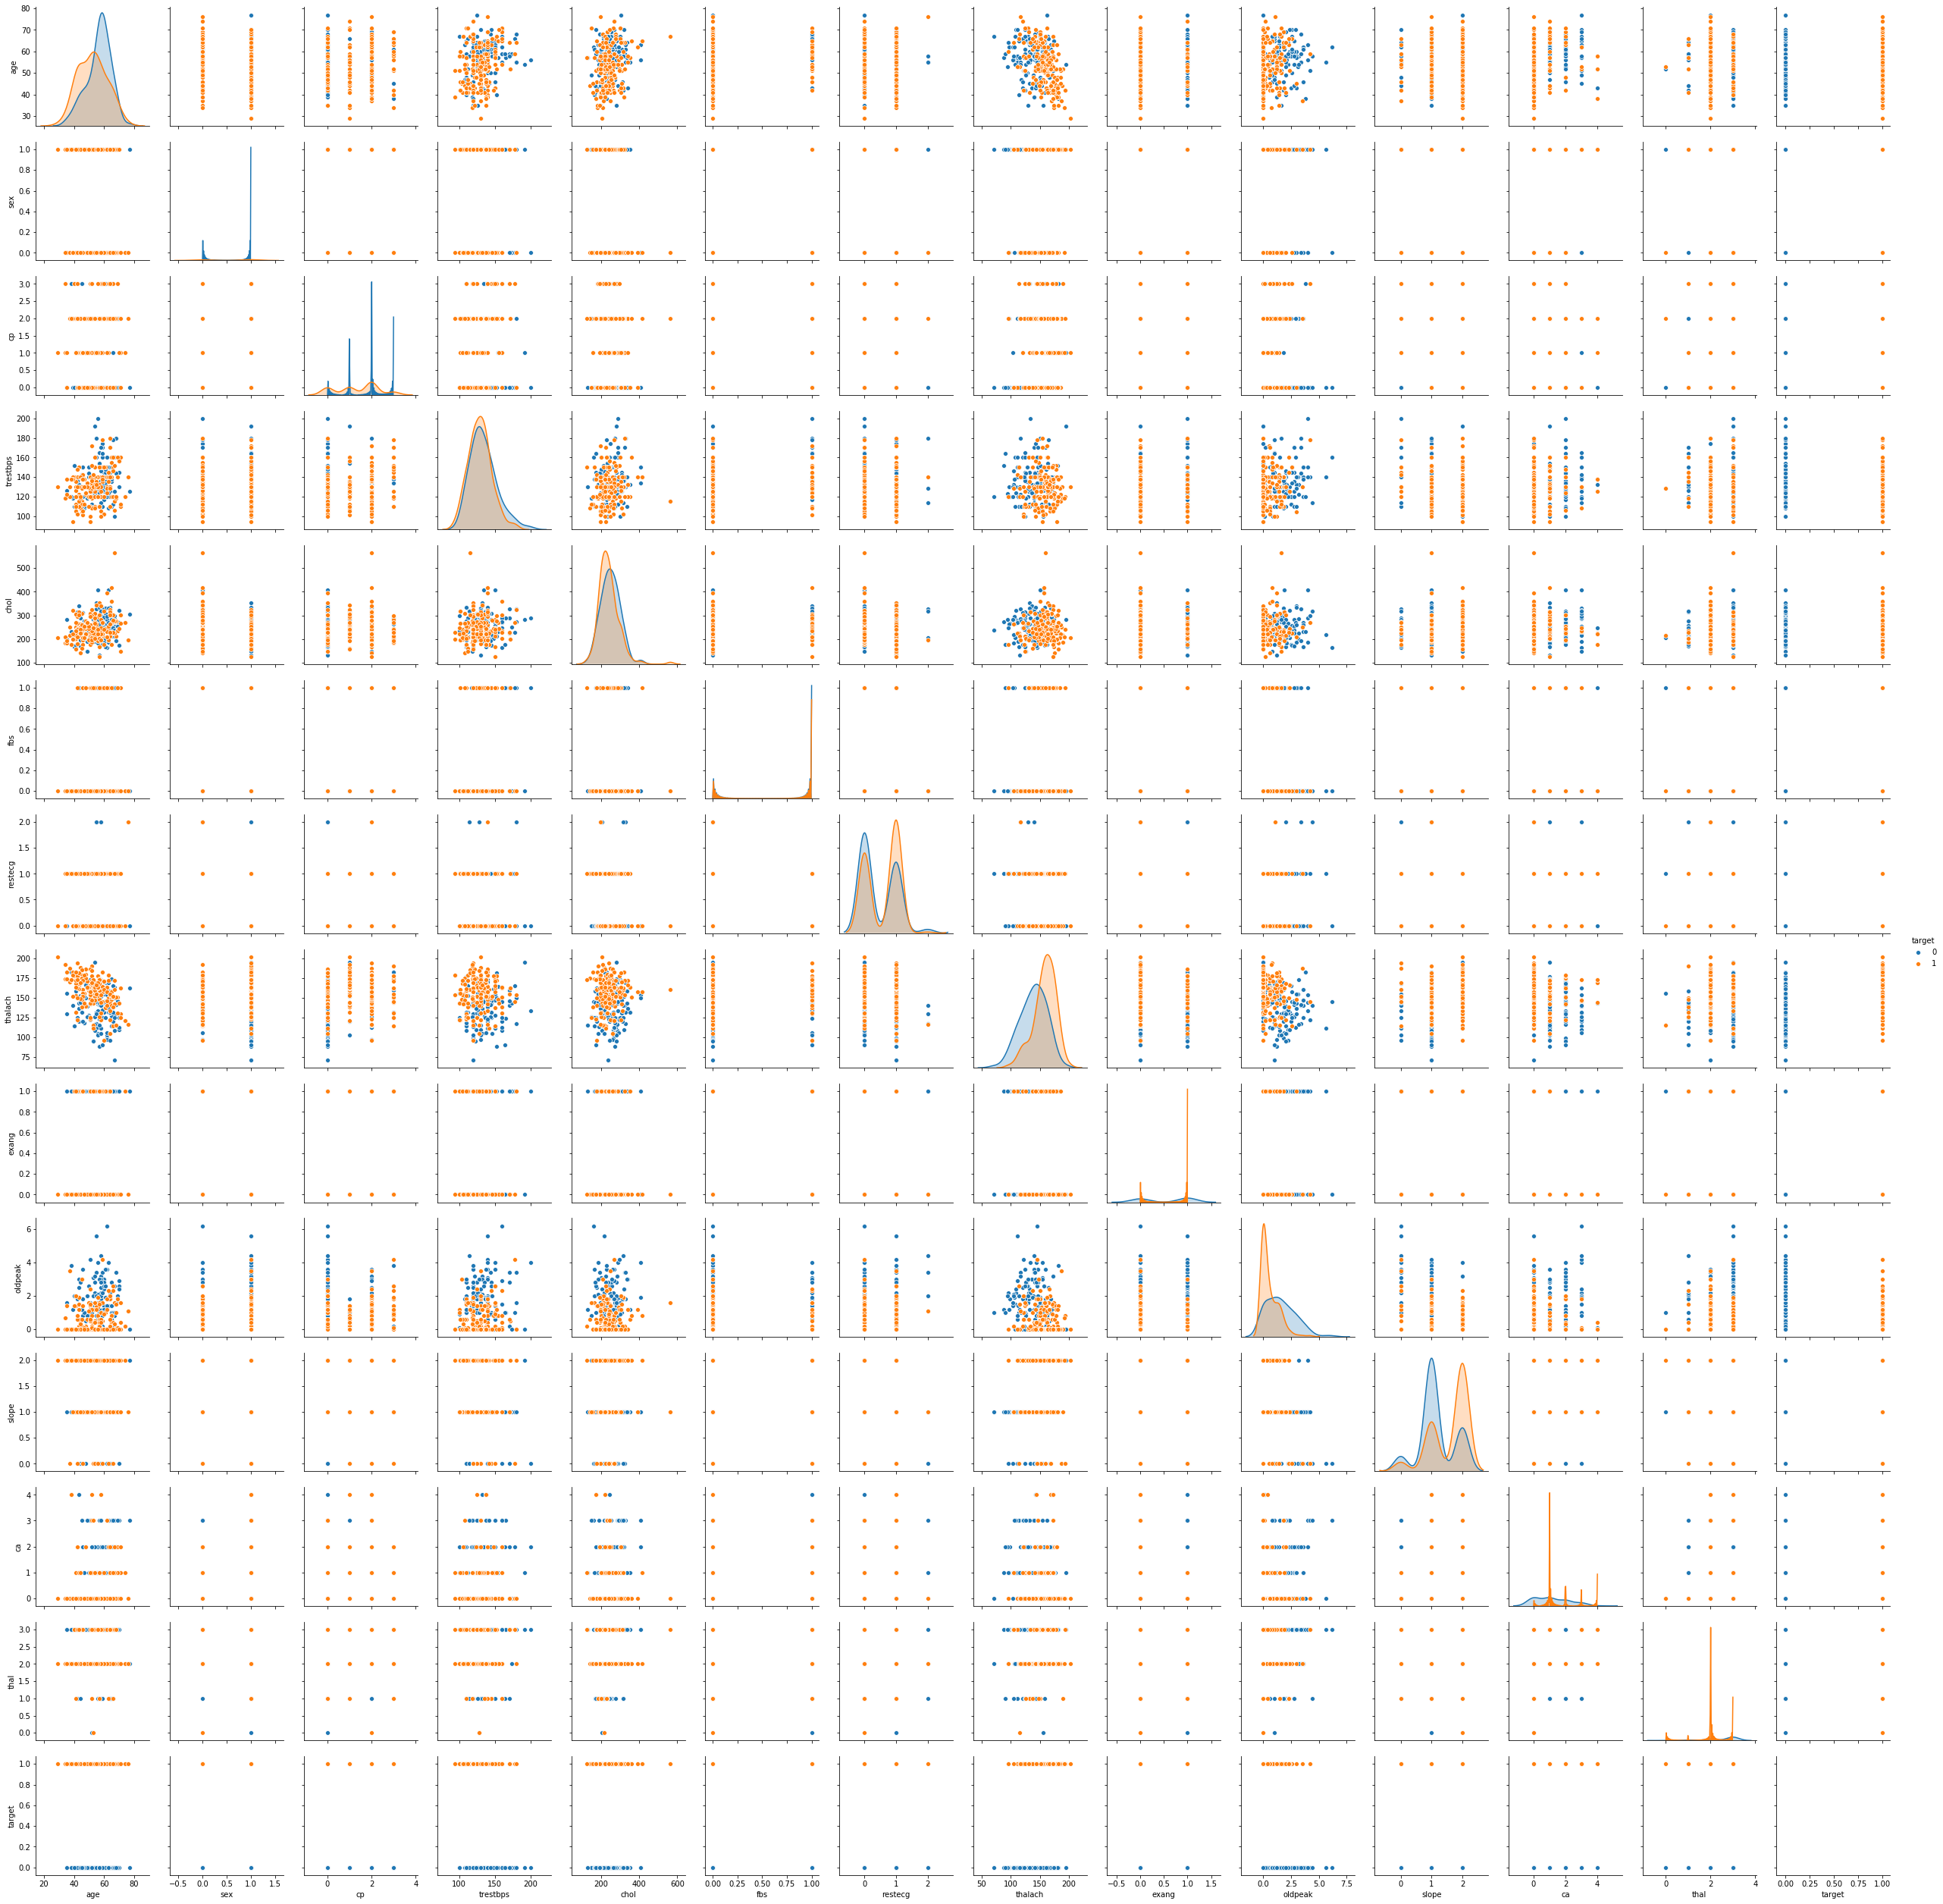

In [55]:
#redo of above
sns.pairplot(df, hue="target")
plt.show

# Individual Exploration

*Data issues: missing values, duplicate values, outliers *Data cleaning solutions: imputation/estimation, dropping entries -- justify your choices! *Describe the realtionship of features to your target (should include at least a few plots). Feature engineering (transformation, normalization, createing new combinations of features, etc), if you think this is necessary. Describe your rationale.

## Missing Values:

This Kaggle Heart data set has 14 features of which there are no missing/null values as shown by df.info() and confirmed by df.isnull(), so we do not need to worry about the missing values for this analysis.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##  Duplicate Values

No duplicate rows found for all 303 samples:

In [58]:
#df.duplicated(subset=None, keep='first')
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

##  Outliers

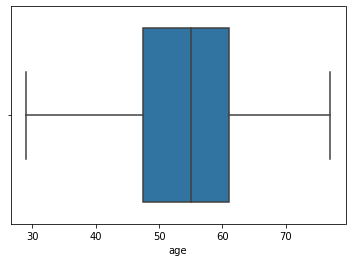

In [60]:
sns.boxplot(x=df['age'])

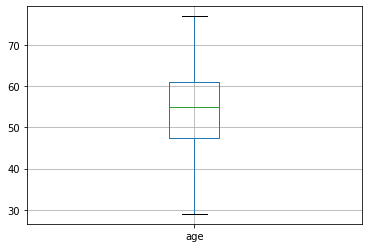

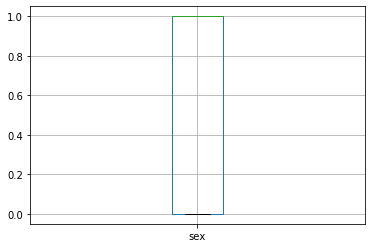

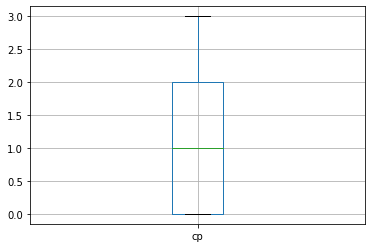

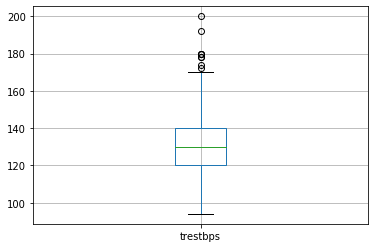

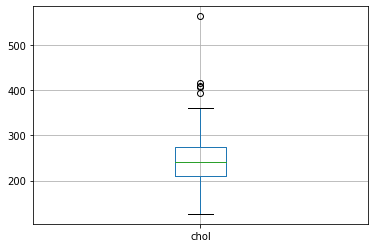

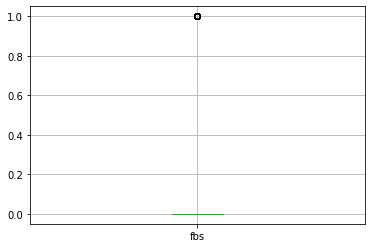

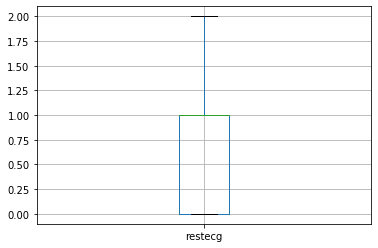

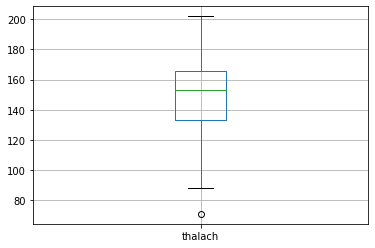

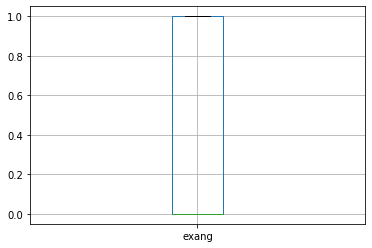

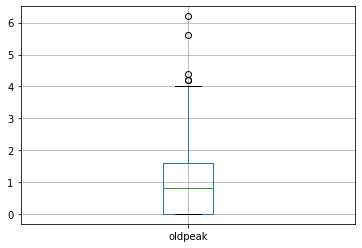

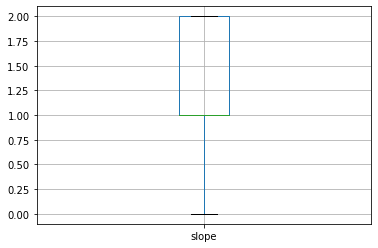

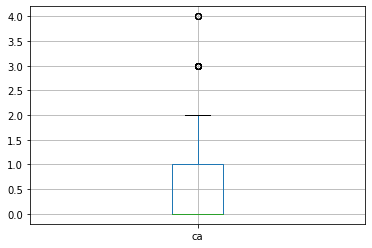

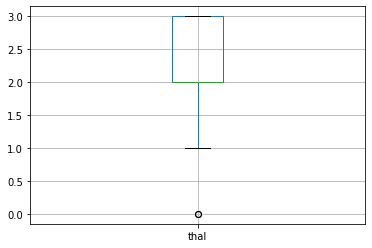

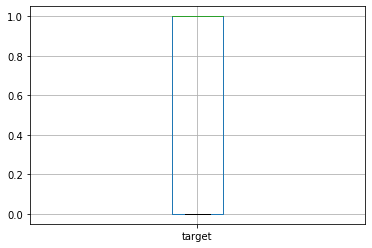

In [62]:
#I want boxplots for each column/feature:
for column in df:
    plt.figure()
    df.boxplot([column])

These boxplots show outliers for these features:

In [65]:
#Now to look at z-scores (from entire dataset)
#The further the score is from 0, the more standard deviations are between that value and the mean, 
#meaning that value is an outlier 
#Accepted values are usually between -3 and 3 standard deviations, so we are looking for: absolute value>3
#This will find absolute value of zscore:

z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [68]:
#Setting z-score value threshold from above to 3
threshold = 3
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


According to zscores, these feature values are outliers:
    Row: 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281
    Paired with these columns:
       4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12 

In [ ]:
For i in df.iloc
    print(z[x][y])

In [76]:
#zpairs = df.iloc [[28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], [4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]]
#print(zpairs)


zx = (28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248, 251, 272, 281)
zy = (4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12)
df.iloc.format[zx,zy]
    

IndentationError: unexpected indent (<ipython-input-76-2e5c12188875>, line 2)

##  Data Cleaning Solutions

##  *Describe the realtionship of features to your target (should include at least a few plots).